# Natural Language Processing Fundamentals in Python
## Named Entity Recognition?

* NLP task to identify important named entities in the text
    * People, places, organizations
    * Dates, states, works of art
    * ... and other categories!
* Can be used alongside topic identification
    * ... or on its own!
* Who? What? When? Where?


In [1]:
#you can see that which article in  the file
!ls data/NLP/Wikipedi_article


wiki_text_bug.txt       wiki_text_debugging.txt wiki_text_malware.txt
wiki_text_computer.txt  wiki_text_exception.txt wiki_text_program.txt
wiki_text_crash.txt     wiki_text_hopper.txt    wiki_text_reversing.txt
wiki_text_debugger.txt  wiki_text_language.txt  wiki_text_software.txt


### nltk and the Stanford CoreNLP Library
* The Stanford CoreNLP library:
* Integrated into Python via nltk
* Java based
* Support for NER as well as coreference and dependency trees

```python
import nltk

In [2]: sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

In [3]: tokenized_sent = nltk.word_tokenize(sentence)
In [4]: tagged_sent = nltk.pos_tag(tokenized_sent)
In [5]: tagged_sent[:3]
Out[5]: [('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]
```

In [2]:
import nltk

sentence = '''In New York, I like to ride the Metro to visit MOMA 
                      and some restaurants rated well by Ruth Reichl.'''

tokenized_sent = nltk.word_tokenize(sentence)
#adding a tag for proper name , pronoun, adjective...
tagged_snt =nltk.pos_tag(tokenized_sent)
print(tagged_snt[:3])

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]


In [3]:
# return the sentence as tree
print(nltk.ne_chunk(tagged_snt))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


In [28]:
file_name = 'data/NLP/New_articles/uber_apple.txt'
with open(file_name, 'r') as file:
    ## Tokenize the article into sentences: sentences
    sentences = nltk.sent_tokenize(file.read())
    # Tokenize each sentence into words: token_sentences
    token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
    # Create the named entity chunks: chunked_sentences
    chunk_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)
    
    for sent in chunk_sentences:
        #print(sent)
        for chunk in sent:
            #The hasattr() method returns true if an object has the given named attribute and false 
            #if it does not.
            if hasattr(chunk, 'label')  and chunk.label() == 'NE':
                print(chunk)
                      

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


['GPE', 'PERSON', 'ORGANIZATION']


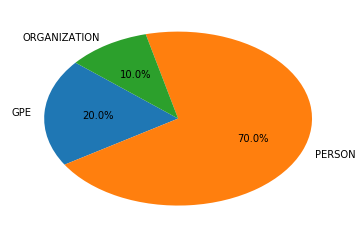

In [38]:
from collections import  defaultdict
import matplotlib.pyplot as plt

file_name = 'data/NLP/New_articles/uber_apple.txt'
with open(file_name, 'r') as file:
    ## Tokenize the article into sentences: sentences
    sentences = nltk.sent_tokenize(file.read())
    # Tokenize each sentence into words: token_sentences
    token_sentences = [nltk.word_tokenize(sent) for sent in sentences]
    # Tag each tokenized sentence into parts of speech: pos_sentences
    pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]
    # Create the named entity chunks: chunked_sentences
    chunk_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)
    ner_categories = defaultdict(int)

    # Create the nested for loop
    for sent in chunk_sentences:
        for chunk in sent:
            if hasattr(chunk, 'label'):
                ner_categories[chunk.label()] += 1

    # Create a list from the dictionary keys for the chart labels: labels
    labels = list(ner_categories.keys())
    print(labels)

    # Create a list of the values: values
    values = [ner_categories.get(l) for l in labels]

    # Create the pie chart
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

    # Display the chart
    plt.show()
   

### SpaCy
* NLP library similar to gensim, with different implementations
* Focus on creating NLP pipelines to generate models and corpora
* Open-source, with extra libraries and tools
    * Displacy
    
    
```python

In [1]: import spacy
In [2]: nlp = spacy.load('en')
In [3]: nlp.entity
Out[3]: <spacy.pipeline.EntityRecognizer at 0x7f76b75e68b8>
In [4]: doc = nlp("""Berlin is the capital of Germany; 
                  and the residence of Chancellor Angela Merkel.""")
In [5]: doc.ents
Out[5]: (Berlin, Germany, Angela Merkel)
In [6]: print(doc.ents[0], doc.ents[0].label_)
Berlin GPE

```

**Why use SpaCy for NER(Name Entity Recognation)?**
* Easy pipeline creation
* Different entity types compared to nltk
* Informal language corpora
    * Easily find entities in Tweets and chat messages
* Quickly growing!

In [40]:
import spacy

In [66]:
#if "en" dosen't work for you
#sudo python -m spacy download en
nlp = spacy.load("en")
nlp.entity
doc = nlp("Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.")
doc.ents
for ent in doc.ents:
    print(ent.text, ent.label_)

Berlin GPE
Germany GPE
Angela Merkel PERSON


In [76]:
file_name = 'data/NLP/New_articles/uber_apple.txt'
with open(file_name, 'r') as file:
    nlp = spacy.load("en")
    nlp.entity
    ff = nlp(file.read())
    for ent in ff.ents:
        print(ent.text, ent.label_)
    

Uber GPE
Uber PERSON
Apple ORG
Uber PERSON
Uber PERSON
Uber PERSON
Travis Kalanick GPE
Uber GPE
Tim Cook PERSON
Apple ORG
Millions CARDINAL
Uber’s ORG
Silicon Valley’s LOC
Yahoo ORG
Marissa Mayer PERSON
186 MONEY
